## Линейная регрессия, метод градиентного спуска

### Выполнил: Андрей Фролов 23.М08

Описание датасета:

- **symboling** --- рейтинг страхового риска
- **CarName** --- название автомобиля
- **fueltype** --- тип топлива
- **aspiration** --- тип двигателя
- **doornumber** --- количество дверей
- **carbody** --- тип кузова
- **drivewheel** --- тип привода
- **enginelocation** --- расположение двигателя
- **wheelbase** --- длина колесной базы
- **carlength** --- длина автомобиля
- **carwidth** --- ширина автомобиля
- **carheight** --- высота автомобиля
- **curbweight** --- снаряженная масса
- **enginetype** --- распределительный вал
- **cylindernumber** --- количество цилиндров
- **enginesize** --- объем двигателя
- **fuelsystem** --- система впрыска
- **boreratio** --- диаметр цилиндра
- **stroke** --- ход поршня
- **compressionratio** --- компрессия в цилиндре
- **horsepower** --- количество лошадиных сил
- **peakrpm** --- пиковые обороты двигателя
- **citympg** --- расход топлива в городе
- **highwaympg** --- расход топлива по трассе
- **price** (целевой признак) --- цена

Было бы интересно научится предсказывать целевой признак **price** (цена) по его нецелевым признакам.

Подключение библиотек

In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [62]:
df = pd.read_csv('/Users/sergioramos4/Downloads/car_price.csv')

In [63]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Общее количество пропущенных значений

In [64]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Посмотрим статистику по целевому признаку

In [65]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

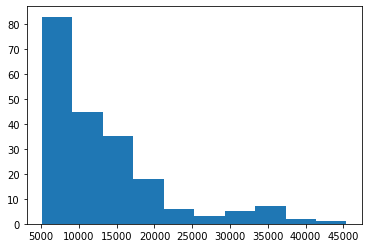

In [66]:
plt.hist(df['price'])
plt.show()

## Первичный анализ признаков

### Порядковый признак symboling

In [67]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

<Axes: xlabel='symboling', ylabel='count'>

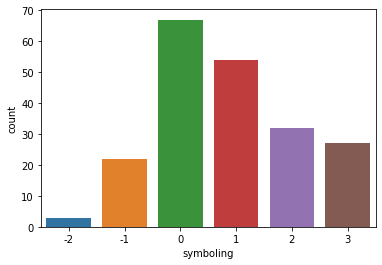

In [68]:
sns.countplot('symboling', data=df)

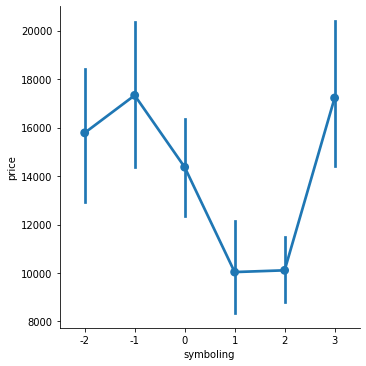

In [69]:
sns.factorplot('symboling', 'price', data=df)

Прямая связь между ценой авто и рейтингом страхового риска не прослеживается

### Категориальный признак Carname

In [70]:
df['CarName'].value_counts()

toyota corolla           6
peugeot 504              6
toyota corona            6
subaru dl                4
mitsubishi outlander     3
                        ..
buick century special    1
plymouth duster          1
peugeot 304              1
volkswagen type 3        1
subaru r1                1
Name: CarName, Length: 147, dtype: int64

Судя по всему, можно попробовать выделить компанию производителя

In [71]:
df['company'] = df['CarName'].str.split(' ').str[0]

In [72]:
df['company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
Nissan          1
toyouta         1
mercury         1
porcshce        1
vokswagen       1
Name: company, dtype: int64

Устраним различия в названиях одной и той же фирмы

In [73]:
df['company'].replace('toyouta', 'toyota',inplace=True)
df['company'].replace('Nissan', 'nissan',inplace=True)
df['company'].replace('maxda', 'mazda',inplace=True)
df['company'].replace('vokswagen', 'volkswagen',inplace=True)
df['company'].replace('vw', 'volkswagen',inplace=True)
df['company'].replace('porcshce', 'porsche',inplace=True)

<Axes: xlabel='company', ylabel='price'>

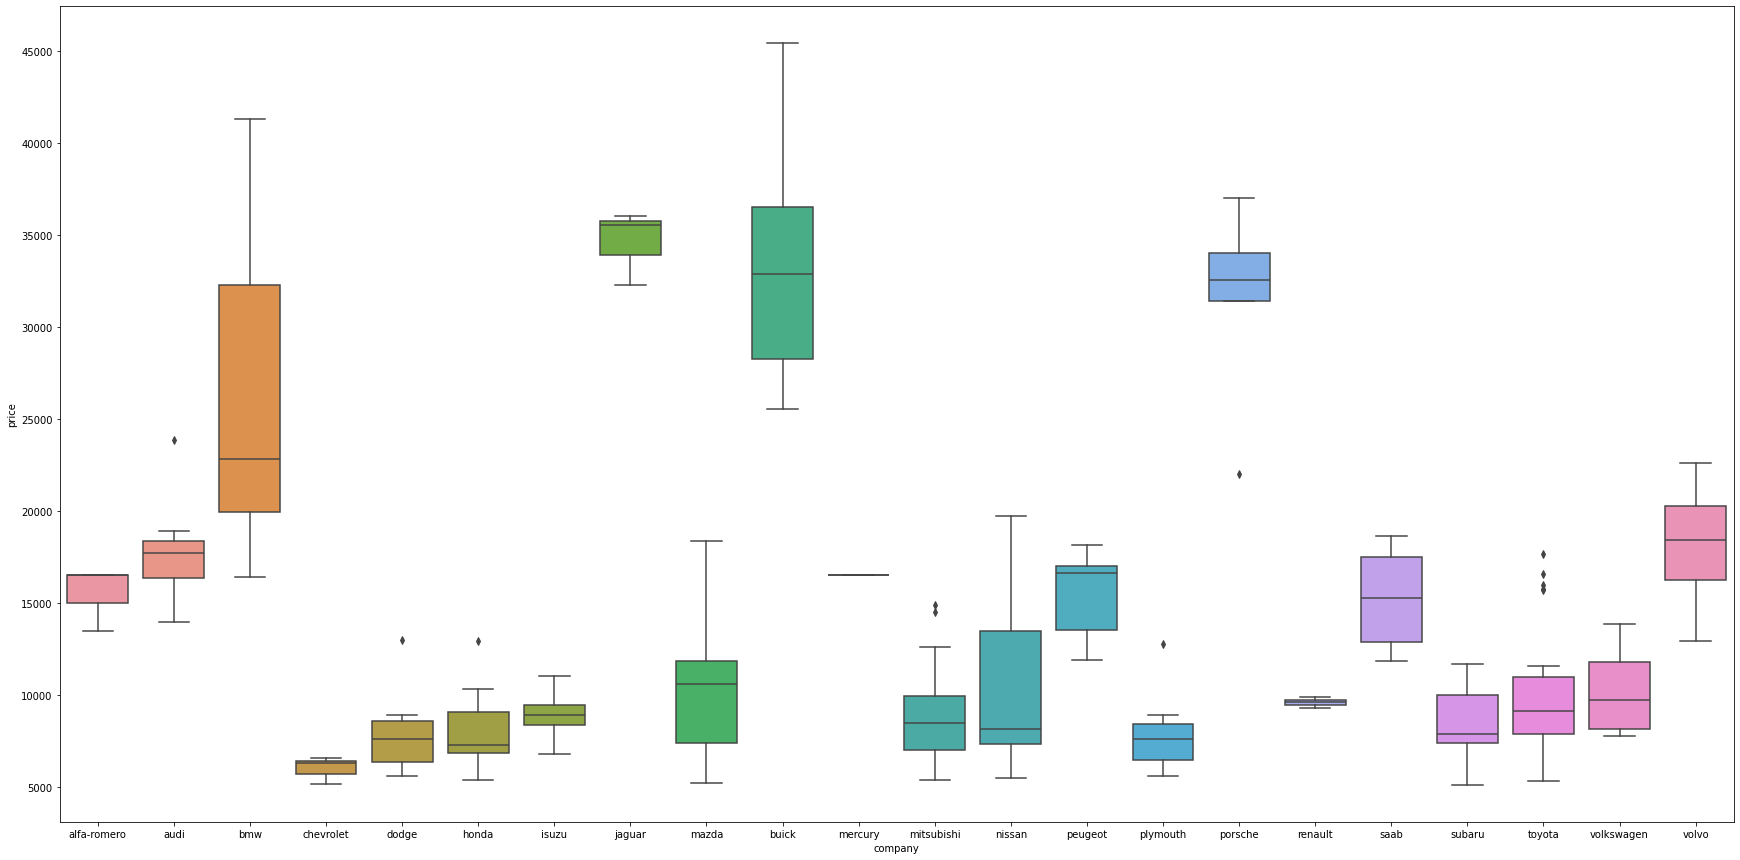

In [74]:
plt.figure(figsize = (30,15))
sns.boxplot(x = "company", y = "price", data = df)

### Категориальный признак fueltype

In [75]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<Axes: xlabel='fueltype', ylabel='count'>

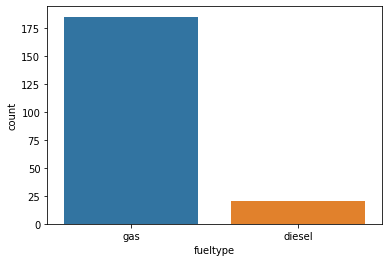

In [76]:
sns.countplot('fueltype', data=df)

<Axes: xlabel='fueltype', ylabel='price'>

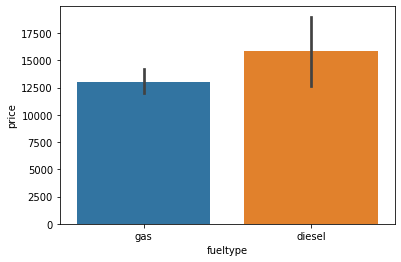

In [77]:
sns.barplot(x = "fueltype", y = "price", data = df)

Авто на дизеле меньше, но в среднем они дороже

### Категориальный признак aspiration

In [78]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

<Axes: xlabel='aspiration', ylabel='count'>

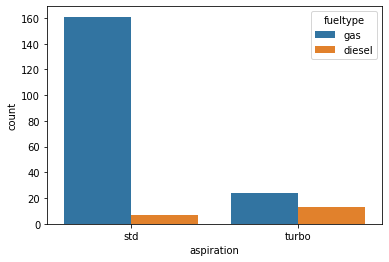

In [79]:
sns.countplot('aspiration', hue='fueltype', data=df)

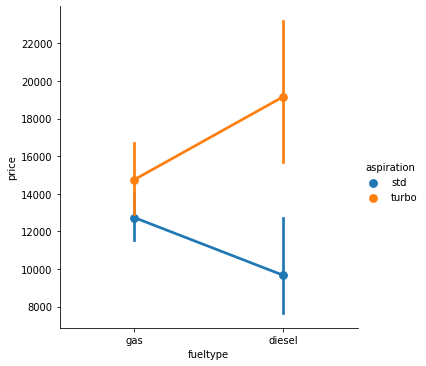

In [80]:
sns.factorplot('fueltype', 'price', hue='aspiration', data=df);

Турбо-дизель заметно дороже атмосферного аналога. В части gas различие также есть, но не столь явное.

### Категориальный признак doornumber

In [81]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [82]:
df['doornumber'].replace('four', 4,inplace=True)
df['doornumber'].replace('two', 2,inplace=True)

<Axes: xlabel='doornumber', ylabel='count'>

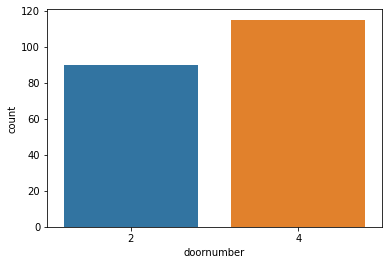

In [83]:
sns.countplot('doornumber', data=df)

<Axes: xlabel='doornumber', ylabel='price'>

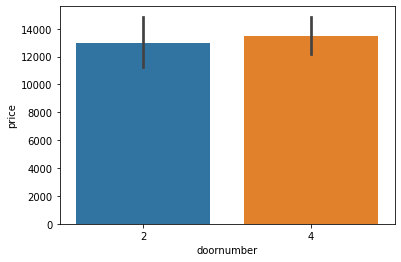

In [84]:
sns.barplot(x = "doornumber", y = "price", data = df)

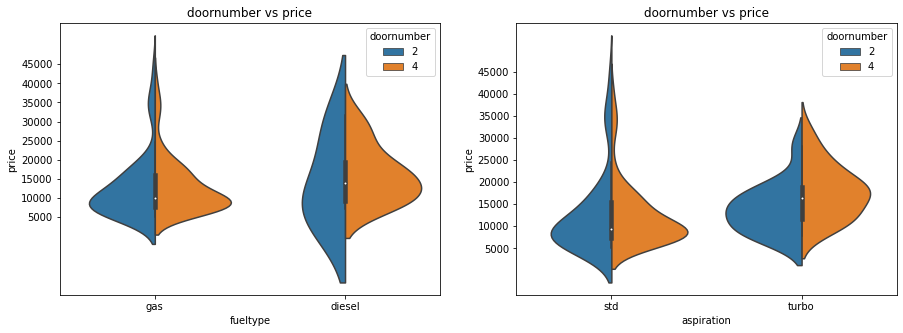

In [85]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot("fueltype", "price", hue="doornumber", data=df, split=True, ax=ax[0])
ax[0].set_title('doornumber vs price')
ax[0].set_yticks(range(5000, 50000, 5000))
sns.violinplot("aspiration", "price", hue="doornumber", data=df, split=True, ax=ax[1])
ax[1].set_title('doornumber vs price')
ax[1].set_yticks(range(5000, 50000, 5000))
plt.show()

### Категориальный признак carbody

In [86]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

<Axes: xlabel='carbody', ylabel='count'>

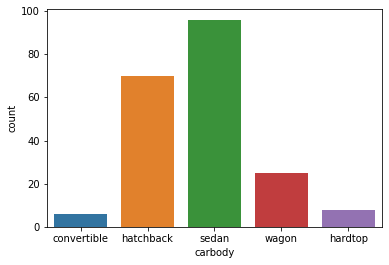

In [87]:
sns.countplot('carbody', data=df)

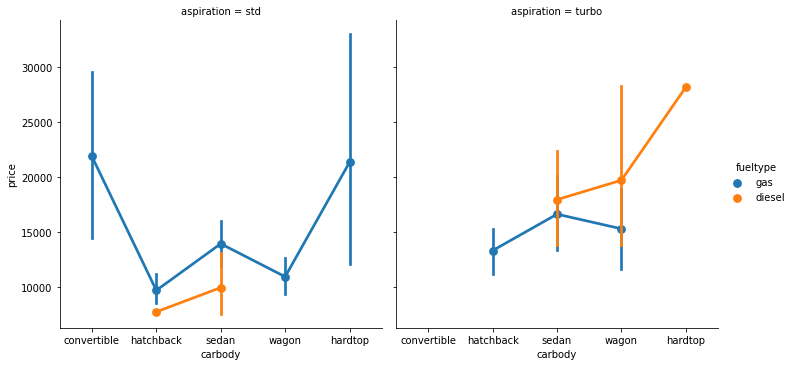

In [88]:
sns.factorplot('carbody', 'price', hue='fueltype', col='aspiration', data=df);

Оказывается, дизельный атмосферник дешевле бензинового на некоторых типах авто

### Категориальный признак drivewheel

In [89]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

<Axes: xlabel='drivewheel', ylabel='count'>

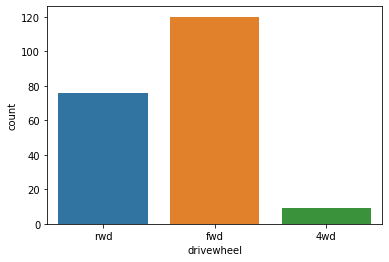

In [90]:
sns.countplot('drivewheel', data=df)

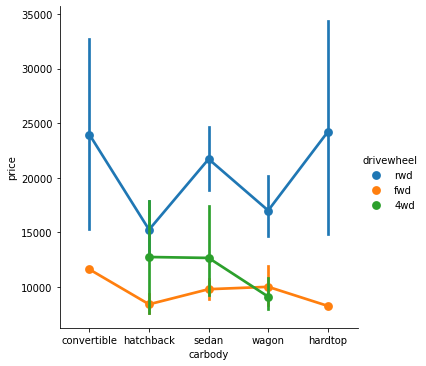

In [91]:
sns.factorplot('carbody', 'price', hue='drivewheel', data=df);

Тип привода довольно точно олицетворяет стоимость авто

### Категориальный признак enginelocation

In [92]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

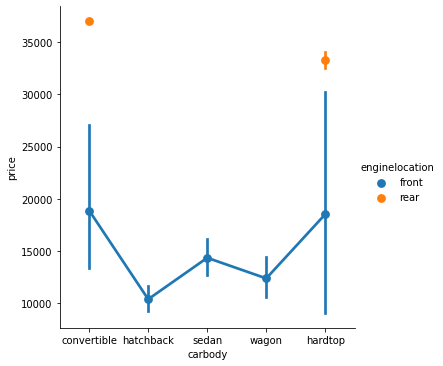

In [93]:
sns.factorplot('carbody', 'price', hue='enginelocation', data=df);

Всего 3 значения, которые к тому же явно выделяются. Признак можно не учитывать

### Количественные признаки: wheelbase, carlength, carwidth, carheight, curbweight

<Axes: xlabel='price', ylabel='Count'>

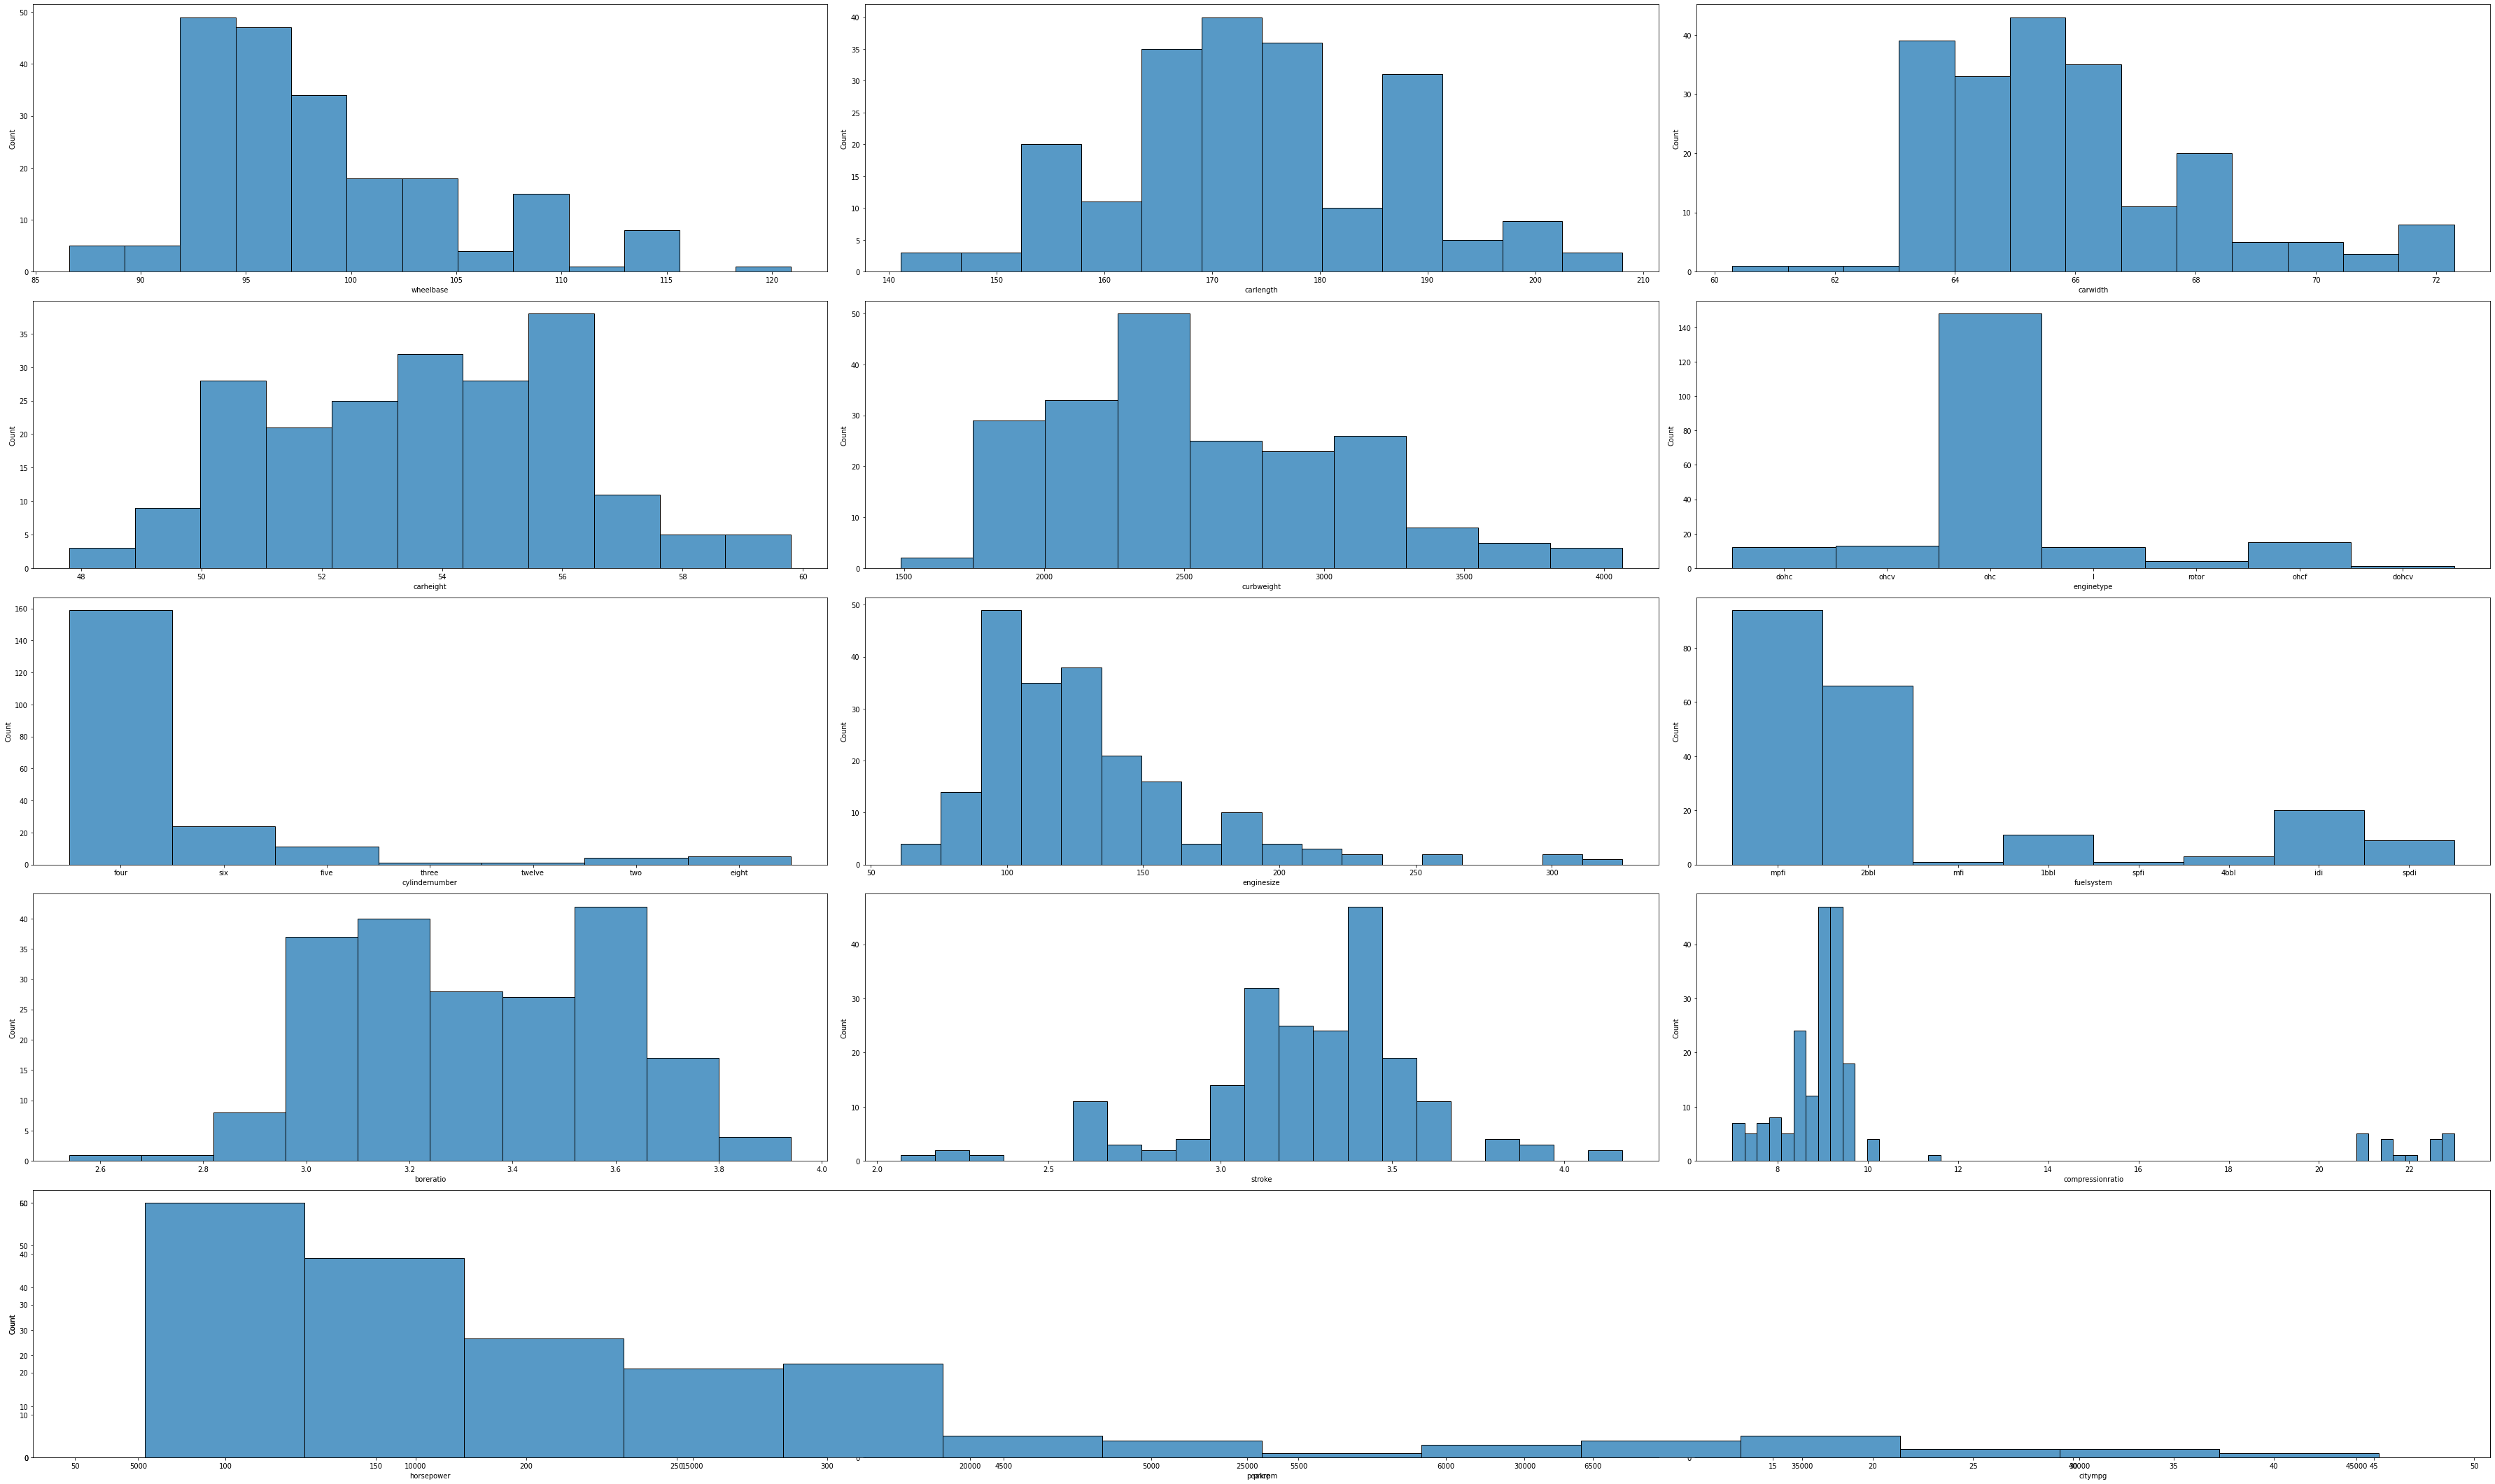

In [94]:
fig = plt.figure(figsize=(50, 30), tight_layout=True)
gs = fig.add_gridspec(5, 3)
for i in range(15):
    sns.histplot(df[df.columns[9 + i]], ax=fig.add_subplot(gs[i // 3, i % 3]))
sns.histplot(df["price"], ax=fig.add_subplot(gs[4, :]))

## Feature Engineering

### Удаление ненужных признаков

In [95]:
df.drop(['car_ID', 'CarName', 'enginelocation'], axis=1, inplace=True)

### Трансформация строк в числа

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,1,0,2,0,2,88.6,168.8,64.1,48.8,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,1,0,2,0,2,88.6,168.8,64.1,48.8,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,94.5,171.2,65.5,52.4,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,1,0,4,3,1,99.8,176.6,66.2,54.3,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,1,0,4,3,0,99.4,176.6,66.4,54.3,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


### Корреляция признаков

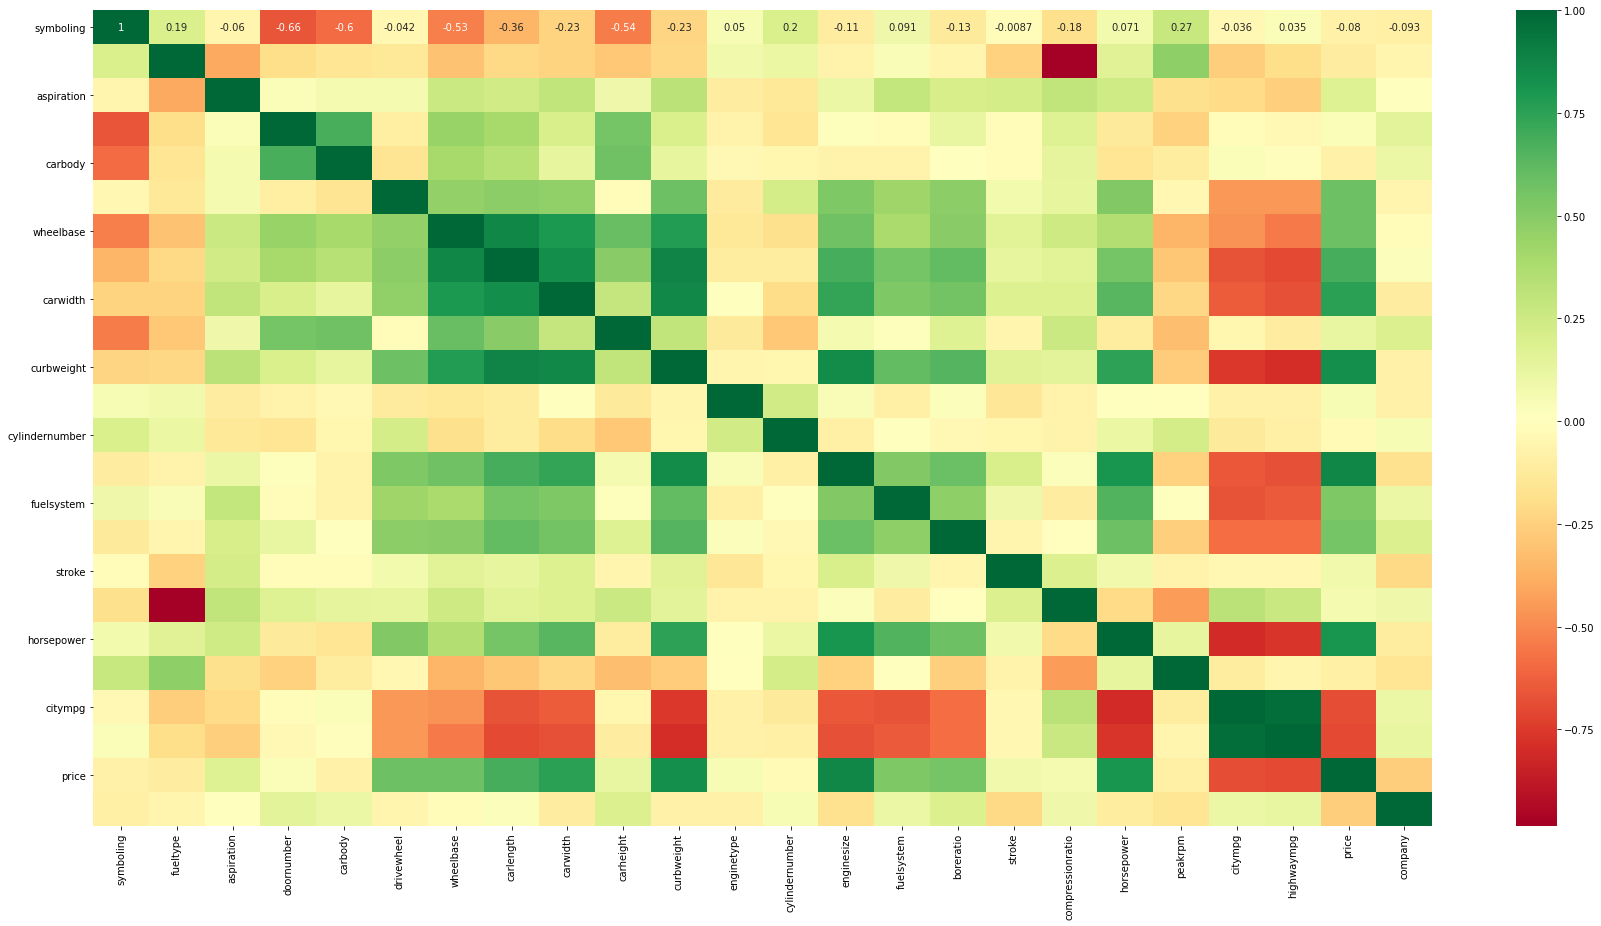

In [97]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(30, 15)
plt.show()

### Распределение данных

In [98]:
from sklearn.model_selection import train_test_split

y = df["price"]
x = df.drop(columns=["price"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Масштабирование признаков

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns)
x_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,company
0,1.728472,0.295468,-0.472456,-1.132843,-0.729728,1.184878,-0.732751,-0.486933,1.044214,-1.430997,...,0.566333,0.808891,2.283389,-0.463121,-0.119155,0.920573,0.721946,-0.969353,-0.521488,0.435778
1,0.100976,0.295468,-0.472456,-1.132843,0.419384,-0.639035,-0.402911,-0.470702,-0.002325,-1.111963,...,-0.414275,-1.170003,-0.643665,1.047536,-0.228694,-0.145078,0.721946,0.041825,0.116403,-0.993250
2,-0.712772,0.295468,-0.472456,0.882735,0.419384,-0.639035,-0.534847,-0.697938,-0.730352,-0.314377,...,-0.701282,-1.170003,-0.495460,-0.720254,-0.256079,-0.888555,-0.771790,0.884473,1.073240,1.070902
3,1.728472,0.295468,2.116601,-1.132843,-0.729728,-0.639035,0.025882,0.949520,0.225184,0.921881,...,-0.151185,0.808891,0.801336,-0.591687,-0.256079,1.341877,0.721946,-0.969353,-0.680960,0.753340
4,0.914724,0.295468,-0.472456,-1.132843,-0.729728,-2.462948,-0.930655,-1.428338,-1.003362,0.762364,...,-0.462109,-1.170003,1.097747,-1.973778,-0.338234,-0.814207,-1.625353,0.210355,0.116403,0.912121


### Подбор наилучших признаков

In [100]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator=LinearRegression())
rfecv.fit(x, y)

print("Наилучшее количество признаков -", rfecv.n_features_)
print("Наиболее подходящие признаки -", x_train.columns[rfecv.support_])

Наилучшее количество признаков - 20
Наиболее подходящие признаки - Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carwidth', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'company'],
      dtype='object')


In [101]:
unsuitableParams = set(df.columns) - set(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carwidth', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'company', 'price'])

x_train = x_train.drop(columns=unsuitableParams)
x_test = x_test.drop(columns=unsuitableParams)
y_train = y_train.drop(columns=unsuitableParams)
y_test = y_test.drop(columns=unsuitableParams)

### Подбор гиперпараметров

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_grid = np.logspace(-3, 3, 100)
tol_grid = np.logspace(-3, 3, 10)

searcher = GridSearchCV(
    Ridge(),
    [{"alpha": alpha_grid, "tol": tol_grid}],
    scoring="neg_root_mean_squared_error",
    cv=5,
)
searcher.fit(x_train, y_train)

best_alpha = searcher.best_params_["alpha"]
best_tol = searcher.best_params_["tol"]

print("Alpha = %.4f" % best_alpha)
print("Tol = %.4f" % best_tol)

Alpha = 17.4753
Tol = 0.0010


## Обучение

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

def print_results(y_train_pred, y_test_pred):
    print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
    print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test MSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=True))
    print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=True))
    print("Test R^2 = %.4f" % r2_score(y_test, y_test_pred))
    print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))

In [104]:
def add_ones_vector(samples):
    samples_matrix = samples.copy()
    if samples.ndim == 1:
        samples_matrix = samples_matrix.reshape(-1, 1)

    ones_vec = np.ones((samples_matrix.shape[0], 1))
    return np.hstack([ones_vec, samples_matrix])

def linear_model(w, x):
    return np.matmul(add_ones_vector(x), w)

### Gradient descent

In [105]:
class SimpleModel:
    def __init__(self, tol=1E-4, alpha=1, step_coef=1E-2, max_iterations=10_000):
        self.w = None
        self.tol = tol
        self.alpha = alpha
        self.step_coef = step_coef
        self.max_iter = max_iterations

    def fit(self, X, y):
        features_num = np.shape(X)[1]
        X_sample = add_ones_vector(X)
        w = np.random.randn(features_num + 1, )

        step = 0
        while step < self.max_iter:
            y_pred = X_sample.dot(w)
            error = y_pred - y

            grad = (1 / X_sample.shape[0]) * (X_sample.T.dot(error) + self.alpha * w)
            diff = self.step_coef * grad
            w -= diff

            step += 1
            if np.all(np.abs(diff) <= self.tol):
                break
        self.w = w

    def predict(self, x):
        return linear_model(self.w, x)

In [106]:
simpleModel = SimpleModel(alpha=best_alpha, tol=best_tol)

simpleModel.fit(x_train.to_numpy(), y_train.to_numpy())

simpleTrainPredict = simpleModel.predict(x_train.to_numpy())
simpleTestPredict = simpleModel.predict(x_test.to_numpy())

print_results(simpleTrainPredict, simpleTestPredict)

Test RMSE = 3871.6202
Train RMSE = 3088.6708
Test MSE = 14989443.0718
Train MSE = 9539887.3963
Test R^2 = 0.7709
Train R^2 = 0.8473


### Ridge

In [107]:
ridgeModel = Ridge(alpha=best_alpha, tol=best_tol)

ridgeModel.fit(x_train.to_numpy(), y_train.to_numpy())

ridgeTrainPredict = ridgeModel.predict(x_train.to_numpy())
ridgeTestPredict = ridgeModel.predict(x_test.to_numpy())

print_results(ridgeTrainPredict, ridgeTestPredict)

Test RMSE = 3500.8157
Train RMSE = 2687.3160
Test MSE = 12255710.5014
Train MSE = 7221667.2237
Test R^2 = 0.8127
Train R^2 = 0.8844


### Stochastic gradient descent

In [108]:
class StochasticModel:

    def __init__(self, tol=1E-4, alpha=1, step_coef=1E-2, max_iterations=10_000):
        self.w=None
        self.tol=tol
        self.alpha=alpha
        self.step_coef = step_coef
        self.max_iter = max_iterations

    def fit(self, X, y):
        samples_num = np.shape(X)[0]
        features_num = np.shape(X)[1]
        X_sample = add_ones_vector(X)
        w = np.random.randn(features_num + 1, )

        step = 0
        while step < self.max_iter:
            rnd_i = np.random.randint(0, samples_num)

            x_batch, y_batch = X_sample[rnd_i, :].reshape(1, features_num + 1), y[rnd_i]
            y_pred = x_batch.dot(w)
            error = y_pred - y_batch

            grad = (1 / x_batch.shape[0]) * (x_batch.T.dot(error) + self.alpha * w)
            diff = self.step_coef * grad
            w -= diff

            step += 1
            if np.all(np.abs(diff) <= self.tol):
                break
        self.w = w

    def predict(self, x):
        return linear_model(self.w, x)

In [109]:
stochasticModel = StochasticModel(alpha=best_alpha, tol=best_tol)

stochasticModel.fit(x_train.to_numpy(), y_train.to_numpy())

stochasticTrainPredict = stochasticModel.predict(x_train.to_numpy())
stochasticTestPredict = stochasticModel.predict(x_test.to_numpy())

print_results(stochasticTrainPredict, stochasticTestPredict)

Test RMSE = 14687.3868
Train RMSE = 14939.7291
Test MSE = 215719331.1916
Train MSE = 223195506.5947
Test R^2 = -2.2967
Train R^2 = -2.5737


### Mini batch gradient descent

In [110]:
import random

class MiniBatchModel:

    def __init__(self, tol=1E-4, alpha=1, step_coef=1E-2, batch_size=10, max_iterations=15_000):
        self.w=None
        self.tol=tol
        self.alpha=alpha
        self.step_coef = step_coef
        self.max_iter = max_iterations
        self.batch_size = batch_size

    def fit(self, X, y):
        samples_num = np.shape(X)[0]
        features_num = np.shape(X)[1]
        X_sample = add_ones_vector(X)
        w = np.random.randn(features_num + 1, )

        step = 0
        while step < self.max_iter:
            all_indices = np.arange(samples_num)
            np.random.shuffle(all_indices)

            num_batch = samples_num // self.batch_size
            batch_indices = np.array_split(all_indices, num_batch)

            diff = self.tol + 1
            for i in range(num_batch):
                x_batch, y_batch = X_sample[batch_indices[i]].reshape(len(batch_indices[i]), features_num + 1), y[batch_indices[i]]
                y_pred = x_batch.dot(w)
                error = y_pred - y_batch

                grad = (1 / x_batch.shape[0]) * (x_batch.T.dot(error) + self.alpha * w)
                diff = self.step_coef * grad
                w -= diff
                if np.all(np.abs(diff) <= self.tol):
                    break
            step += 1
            if np.all(np.abs(diff) <= self.tol):
                break
        self.w = w

    def predict(self, x):
        return linear_model(self.w, x)

In [111]:
miniBatchModel = MiniBatchModel(alpha=best_alpha, tol=best_tol, batch_size=x_train.shape[0] // 50)

miniBatchModel.fit(x_train.to_numpy(), y_train.to_numpy())

miniBatchTrainPredict = miniBatchModel.predict(x_train.to_numpy())
miniBatchTestPredict = miniBatchModel.predict(x_test.to_numpy())

print_results(miniBatchTrainPredict, miniBatchTestPredict)

Test RMSE = 13749.5383
Train RMSE = 14041.3394
Test MSE = 189049804.6817
Train MSE = 197159213.4681
Test R^2 = -1.8891
Train R^2 = -2.1568


### Проверка

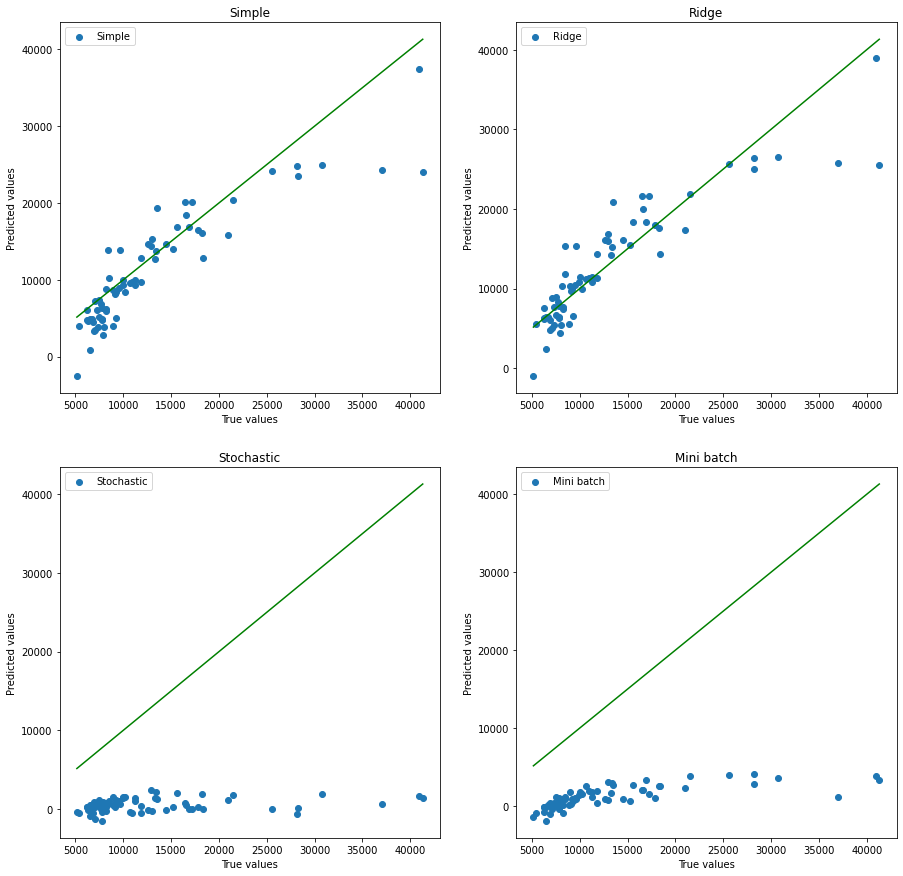

In [112]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.ravel()

ax[0].scatter(y_test, simpleTestPredict, label="Simple")
ax[0].set_title("Simple")

ax[1].scatter(y_test, ridgeTestPredict, label="Ridge")
ax[1].set_title("Ridge")

ax[2].scatter(y_test, stochasticTestPredict, label="Stochastic")
ax[2].set_title("Stochastic")

ax[3].scatter(y_test, miniBatchTestPredict, label="Mini batch")
ax[3].set_title("Mini batch")

for a in ax:
    a.set_xlabel("True values")
    a.set_ylabel("Predicted values")
    a.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='green')
    a.legend()

plt.show()

### Кросс-валидация

In [113]:
from sklearn.model_selection import KFold

fold = KFold(n_splits=5)

results = {
    "Simple": pd.DataFrame(index=['mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test']),
    "Ridge": pd.DataFrame(index=['mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test']),
    "Stochastic": pd.DataFrame(index=['mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test']),
    "MiniBatch": pd.DataFrame(index=['mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test'])
}

models = {
    "Simple": SimpleModel(alpha=best_alpha, tol=best_tol),
    "Ridge": Ridge(alpha=best_alpha, tol=best_tol),
    "Stochastic": StochasticModel(alpha=best_alpha, tol=best_tol),
    "MiniBatch": MiniBatchModel(alpha=best_alpha, tol=best_tol, batch_size=x_train.to_numpy().shape[0] // 8),
}

for name, model in models.items():
    splited_samples = fold.split(X=x_train.to_numpy(), y=y_train.to_numpy())
    for fold_i, (train_i, test_i) in enumerate(splited_samples):
        copy_x_train = x_train.to_numpy()[train_i, :]
        copy_x_test = x_train.to_numpy()[test_i, :]
        copy_y_train = y_train.to_numpy()[train_i]
        copy_y_test = y_train.to_numpy()[test_i]
        
        model.fit(copy_x_train, copy_y_train)

        y_predf_train = model.predict(copy_x_train)
        y_predf_test = model.predict(copy_x_test)

        mse_train = mean_squared_error(copy_y_train, y_predf_train, squared=True)
        mse_test = mean_squared_error(copy_y_test, y_predf_test, squared=True)

        rmse_train = mean_squared_error(copy_y_train, y_predf_train, squared=False)
        rmse_test = mean_squared_error(copy_y_test, y_predf_test, squared=False)

        r2_train = r2_score(copy_y_train, y_predf_train)
        r2_test = r2_score(copy_y_test, y_predf_test)

        results[name].insert(loc=fold_i, column=f"Fold{fold_i + 1}", value=[
            mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test
        ])

    results[name]["E"] = results[name].mean(axis=1)
    results[name]["STD"] = results[name].std(axis=1)

In [114]:
results["Simple"]

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,1.084044e+07,1.001650e+07,1.076779e+07,1.030005e+07,1.011781e+07,1.040852e+07,3.363265e+05
mse-test,1.395851e+07,2.503447e+07,1.012993e+07,1.590071e+07,1.688830e+07,1.638239e+07,4.905403e+06
rmse-train,3.292482e+03,3.164886e+03,3.281430e+03,3.209369e+03,3.180851e+03,3.225804e+03,5.204254e+01
rmse-test,3.736109e+03,5.003446e+03,3.182756e+03,3.987569e+03,4.109538e+03,4.003884e+03,5.927070e+02
r2-train,8.395089e-01,8.483313e-01,8.335276e-01,8.232982e-01,8.171360e-01,8.323604e-01,1.114846e-02
r2-test,6.581554e-01,4.824433e-01,8.018618e-01,7.928952e-01,8.099223e-01,7.090556e-01,1.263013e-01


In [115]:
results["Ridge"]

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,7.469184e+06,6.656524e+06,7.323218e+06,6.875318e+06,6.551416e+06,6.975132e+06,3.622872e+05
mse-test,8.540423e+06,1.464467e+07,7.269188e+06,1.190480e+07,1.159761e+07,1.079134e+07,2.615730e+06
rmse-train,2.732981e+03,2.580024e+03,2.706144e+03,2.622083e+03,2.559573e+03,2.640161e+03,6.842070e+01
rmse-test,2.922400e+03,3.826836e+03,2.696143e+03,3.450333e+03,3.405527e+03,3.260248e+03,4.026452e+02
r2-train,8.894198e-01,8.992077e-01,8.867814e-01,8.820509e-01,8.815932e-01,8.878106e-01,6.408951e-03
r2-test,7.908446e-01,6.972395e-01,8.578171e-01,8.449415e-01,8.694690e-01,8.120623e-01,6.341060e-02


In [116]:
results["Stochastic"]

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,2.247538e+08,1.790056e+08,2.368329e+08,1.856276e+08,2.037749e+08,2.059990e+08,2.214073e+07
mse-test,1.782510e+08,1.975164e+08,1.828554e+08,2.124836e+08,2.759506e+08,2.094114e+08,3.536830e+07
rmse-train,1.499179e+04,1.337930e+04,1.538938e+04,1.362452e+04,1.427497e+04,1.433199e+04,7.700381e+02
rmse-test,1.335107e+04,1.405405e+04,1.352240e+04,1.457682e+04,1.661176e+04,1.442322e+04,1.175633e+03
r2-train,-2.327448e+00,-1.710481e+00,-2.661491e+00,-2.184522e+00,-2.682920e+00,-2.313372e+00,3.572200e-01
r2-test,-3.365374e+00,-3.083407e+00,-2.576591e+00,-1.767573e+00,-2.105822e+00,-2.579753e+00,5.924738e-01


In [117]:
results["MiniBatch"]

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,5.306991e+07,5.142892e+07,5.456090e+07,5.330647e+07,5.294348e+07,5.306194e+07,9.987508e+05
mse-test,5.673280e+07,8.044042e+07,4.503233e+07,6.564339e+07,7.287497e+07,6.414478e+07,1.236311e+07
rmse-train,7.284909e+03,7.171396e+03,7.386535e+03,7.301128e+03,7.276227e+03,7.284039e+03,6.862603e+01
rmse-test,7.532118e+03,8.968858e+03,6.710613e+03,8.102061e+03,8.536684e+03,7.970067e+03,7.891873e+02
r2-train,2.143077e-01,2.212694e-01,1.564762e-01,8.550444e-02,4.312754e-02,1.441370e-01,7.023713e-02
r2-test,-3.893889e-01,-6.630058e-01,1.191824e-01,1.450029e-01,1.797928e-01,-1.216833e-01,3.419714e-01


Результаты обычного градиентного спуска практически не отличается от Ridge версии и отлично предсказывают стоимость автомобиля. Мини-пакетный градиентный спуск схож со стохастическим, но не дает столь точных предсказаний.